In [1]:
"""
 supervised_ML.ipynb

 Use supervised learning to predict the stock price.
"""

'\n supervised_ML.ipynb\n\n Use supervised learning to predict the stock price.\n'

#### Libraries and modules

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import r2_score
from prophet import Prophet
import prophet
import warnings
from math import sqrt, isqrt, ceil

Importing plotly failed. Interactive plots will not work.


In [3]:
# Import modules
from prophet_e2e import prophet_e2e

In [4]:
!more prophet_e2e.py

"""
    prophet_e2e.py
    Author: Anuvrat Chaturvedi
    Date: 26th April 2020
    Purpose: End-to-end model fitting and plotting for Prophet model for the given stock
"""

# Import libraries
import pandas as pd
from numpy import sqrt
import os
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    explained_variance_score,
    r2_score,
    mean_absolute_percentage_error,
)
from prophet.utilities import regressor_coefficients


def prophet_e2e(
    close_prices_adj_top: pd.DataFrame,
    selected_stock: str,
    test_size: int = 30,
    save_charts: bool = True,
    save_metrics: bool = True,
    output_dir: str = "../prophet_charts/",
    verbose: bool = True,
):
    # Print the selected stock
    print(f"Now predicting for: {selected_stock}")

    # Adding the backslash to the output directory if not present to make the location name consistent
    if output_dir[-1] != "/":
        output_dir +=

In [5]:
# Define common variables
data_folder = '../data/'
prophet_folder = '../prophet_charts/'
data_start_date='2015-01-01'
test_size=30

#### Creating data

In [6]:
# Load datasets
top500_data_nona = pd.read_pickle(data_folder + 'top500_data_nona.pkl')

In [7]:
# Extract the adjusted close prices
close_prices_adj = top500_data_nona.xs('Adj Close', axis=1, level=0)
close_prices_adj.columns.name = None
close_prices_adj.index.name = None

In [8]:
# Define top 20 stocks based on inputs from an external source (Investopedia)
top_stocks=['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'TSLA', 'GOOG', 'BRK.B', 'META', 'UNH', 'XOM', 'LLY', 'JPM', 'JNJ', 'V', 'PG', 'MA', 'AVGO', 'HD', 'CVX', 'MRK', 'ABBV', 'COST', 'PEP', 'ADBE']
existing_top_stocks = [col for col in top_stocks if col in close_prices_adj.columns] #4 stocks are not in the dataset - BRK.B, ABBV, META, TSLA

In [9]:
# Select the top 20 stocks since 1st Jan 2019
close_prices_adj_top=close_prices_adj[existing_top_stocks][close_prices_adj.index>=data_start_date]
# Save the dataset as a pickle file
close_prices_adj_top.to_pickle(data_folder + 'close_prices_adj_top_supervised.pkl')

### Fitting Prophet and saving visualizations and metrics dataframe

In [10]:
selected_stock="AAPL"
df_train_test = (
        close_prices_adj_top[selected_stock]
        .reset_index()
        .rename(columns={"index": "ds", selected_stock: "y"})
    )
df_train_test["ds"] = pd.to_datetime(df_train_test["ds"])

# Split the data into training and test sets
test_indices = [_ for _ in df_train_test.ds.sort_values(ascending=False)][
        :test_size
    ]
train = df_train_test[~df_train_test.ds.isin(test_indices)]
test = df_train_test[df_train_test.ds.isin(test_indices)]


In [11]:
m = Prophet()

In [12]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
train['nfl_sunday'] = train['ds'].apply(nfl_sunday)
train

C:\Users\Anuvrat\AppData\Local\Temp\ipykernel_33768\872537001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['nfl_sunday'] = train['ds'].apply(nfl_sunday)


,ds,y,nfl_sunday
0,2015-01-02,24.402172,0
1,2015-01-05,23.714720,0
2,2015-01-06,23.716957,0
3,2015-01-07,24.049517,0
4,2015-01-08,24.973555,0
...,...,...,...
2328,2024-04-04,168.591339,0
2329,2024-04-05,169.350296,0
2330,2024-04-08,168.221832,0
2331,2024-04-09,169.440170,0


In [13]:
# Run the prophet_e2e function
# Turn off warnings
warnings.filterwarnings('ignore')
for stock in existing_top_stocks:
    prophet_e2e(close_prices_adj_top=close_prices_adj_top, selected_stock=stock, test_size=test_size, save_charts=True, save_metrics=True, output_dir=prophet_folder, verbose=False)
# Turn on warnings
warnings.filterwarnings('default')

Now predicting for: AAPL


19:29:49 - cmdstanpy - INFO - Chain [1] start processing
19:29:49 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: MSFT


19:29:50 - cmdstanpy - INFO - Chain [1] start processing
19:29:51 - cmdstanpy - INFO - Chain [1] done processing
19:29:52 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: AMZN


19:29:52 - cmdstanpy - INFO - Chain [1] done processing
19:29:53 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: NVDA


19:29:54 - cmdstanpy - INFO - Chain [1] done processing
19:29:55 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: GOOGL


19:29:55 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: GOOG


19:29:57 - cmdstanpy - INFO - Chain [1] done processing
19:29:58 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: UNH


19:29:58 - cmdstanpy - INFO - Chain [1] done processing
19:29:59 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: XOM


19:29:59 - cmdstanpy - INFO - Chain [1] done processing
19:30:00 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: LLY


19:30:01 - cmdstanpy - INFO - Chain [1] done processing
19:30:02 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: JPM


19:30:03 - cmdstanpy - INFO - Chain [1] done processing
19:30:04 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: JNJ


19:30:04 - cmdstanpy - INFO - Chain [1] done processing
19:30:05 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: V


19:30:06 - cmdstanpy - INFO - Chain [1] done processing
19:30:07 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: PG


19:30:08 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: MA


19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:10 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: AVGO


19:30:11 - cmdstanpy - INFO - Chain [1] done processing
19:30:12 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: HD


19:30:12 - cmdstanpy - INFO - Chain [1] done processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: CVX


19:30:14 - cmdstanpy - INFO - Chain [1] done processing
19:30:15 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: MRK


19:30:15 - cmdstanpy - INFO - Chain [1] done processing
19:30:16 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: COST


19:30:17 - cmdstanpy - INFO - Chain [1] done processing
19:30:18 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: PEP


19:30:18 - cmdstanpy - INFO - Chain [1] done processing
19:30:19 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: ADBE


19:30:20 - cmdstanpy - INFO - Chain [1] done processing


#### Prophet evaluation metrics

In [14]:
# Load the metrics
metrics_df = pd.read_pickle(prophet_folder + 'prophet_e2e_metrics.pkl')
#display(metrics_df)

#### Multifacet chart for top 25 stocks

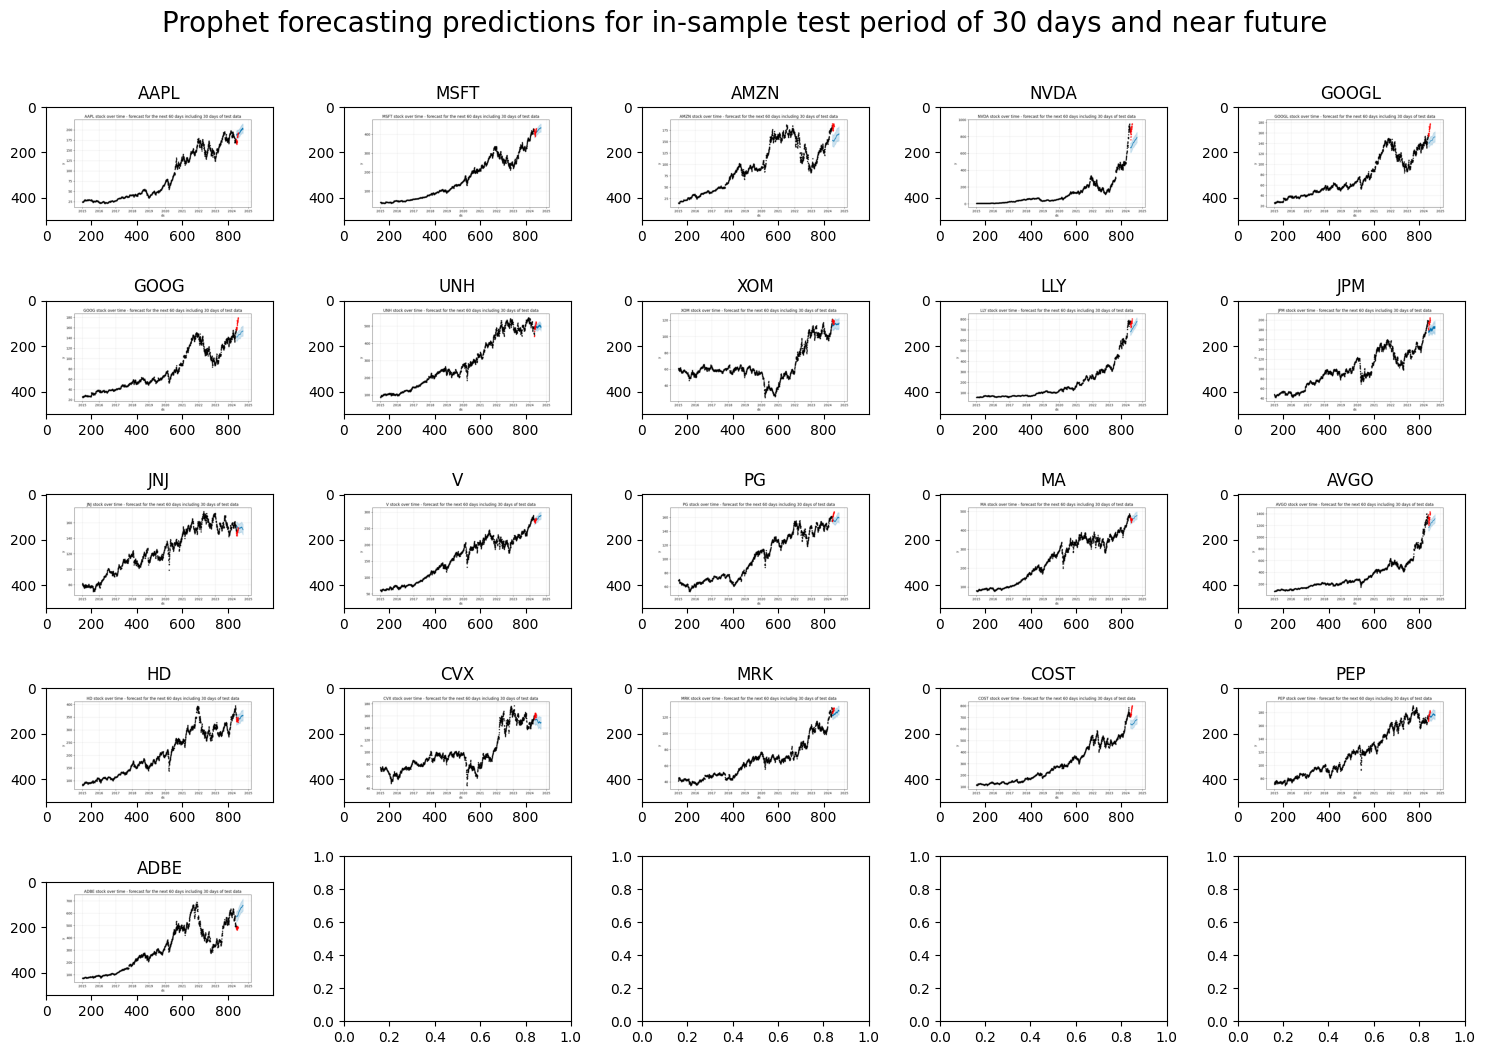

In [15]:
# Checking if the number of stocks is a perfect square
int_sqrt = isqrt(len(existing_top_stocks))
full_sqrt = sqrt(len(existing_top_stocks))

if int_sqrt==full_sqrt: # Perfect square
    nrows=int_sqrt
    ncols=int_sqrt
else:
    nrows=int_sqrt+1
    ncols=ceil(len(existing_top_stocks)/(int_sqrt+1))

# Adding the backslash to the input directory if not present to make the location name consistent
if prophet_folder[-1] != "/":
    prophet_folder += "/"

# Showing a multifacet plot of the metrics
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10))
for i, stock in enumerate(existing_top_stocks):
    row = i // ncols
    col = i % ncols
    img_path = prophet_folder  + "prophet_e2e_forecast_" + stock + '.png'
    img = mpimg.imread(img_path)
    ax[row, col].imshow(img)
    ax[row, col].set_title(stock)
plt.tight_layout()
plt.suptitle("Prophet forecasting predictions for in-sample test period of 30 days and near future", fontsize=20, y=1.05)
plt.show()


### ARIMA

In [ ]:
# Define common variables
data_folder = '../data/'
prophet_folder = '../prophet_charts/'
data_start_date='2015-01-01'
test_size=30

### SARIMA